# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
from collections import namedtuple
import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 

In [2]:
Abs = []
for m in (10,20,50,100,1000):
    Abs.append(main.random_matrix_Ab(m))

***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*.

In [3]:
solutions = []
for el in Abs:
    solutions.append(np.linalg.solve(*el))

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

In [4]:
norms = []
for i in range(len(Abs)):
    norms.append(main.residual_norm(Abs[i][0],solutions[i], Abs[i][1]))

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

In [5]:
conditions = []
Abs2 = []
elem = namedtuple("matrix_and_solutions",['A','b'])
for el in Abs:
    Abs2.append(elem(el[0],el[1]))
for el in Abs2:
    conditions.append(np.linalg.cond(el.A))

print("conditions:", conditions)
print('norms:',norms)

conditions: [8.652875057276864, 32.30799991360635, 106.07687781694871, 239.3452856623666, 4573.4168893583565]
norms: [5.2964038544713694e-14, 2.8492675107491184e-13, 1.6316898804638571e-12, 6.500110812188922e-12, 1.2465869175687905e-09]


4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 
  
ODP: Tak - jak widać z poprzednich printów zarówno uwarunkowania jak i normy są coraz większe wraz ze wzrostem wymiarów macierzy

***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [6]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

In [7]:
from copy import deepcopy
sings = namedtuple('singsa',['log','gra','low'])
sing_vals = []
for el in Abs2:
    log = main.log_sing_value(len(el.A),-5,5)
    gra = main.order_sing_value(len(el.A),4,'gre')
    low = main.order_sing_value(len(el.A),-4,'low')
    sing_vals.append(sings(log,gra,low))
matrixes3 = namedtuple('matrixes',['log','gra','low'])
new_matrixes = []

for ind,el in enumerate(Abs2):
    log = main.create_matrix_from_A(el.A,sing_vals[ind].log)
    gra = main.create_matrix_from_A(el.A,sing_vals[ind].gra)
    low = main.create_matrix_from_A(el.A,sing_vals[ind].low)
    new_matrixes.append(matrixes3(log,gra,low))
sings2 = namedtuple('singsa2',['log','gra','low'])
wps_tupl = sings2({10:[],20:[],50:[],100:[],1000:[]},{10:[],20:[],50:[],100:[],1000:[]},{10:[],20:[],50:[],100:[],1000:[]})
for mat3 in new_matrixes:
    # print('loq',mat3.log)
    print(f'n = {len(mat3.log)}: sign_type = log')
    wps_tupl.log[len(mat3.log)].append(np.linalg.cond(mat3.log))
    print('wsp_uwar:', wps_tupl.log[len(mat3.log)][-1], end='\n----\n')

    # print('gra',mat3.gra)
    print(f'n = {len(mat3.gra)}: sign_type = gra')
    wps_tupl.gra[len(mat3.gra)].append(np.linalg.cond(mat3.gra))
    print('wsp_uwar:', wps_tupl.gra[len(mat3.gra)][-1], end='\n----\n')

    print(f'n = {len(mat3.low)}: sign_type = low')
    wps_tupl.low[len(mat3.low)].append(np.linalg.cond(mat3.low))
    print('wsp_uwar:', wps_tupl.low[len(mat3.low)][-1])
    print('-------------------------------------')

n = 10: sign_type = log
wsp_uwar: 10000000392.55247
----
n = 10: sign_type = gra
wsp_uwar: 10868.089260435552
----
n = 10: sign_type = low
wsp_uwar: 68373.02880538075
-------------------------------------
n = 20: sign_type = log
wsp_uwar: 9999999317.282457
----
n = 20: sign_type = gra
wsp_uwar: 22662.38684413176
----
n = 20: sign_type = low
wsp_uwar: 97776.65645684578
-------------------------------------
n = 50: sign_type = log
wsp_uwar: 9999999612.172478
----
n = 50: sign_type = gra
wsp_uwar: 20989.618238160703
----
n = 50: sign_type = low
wsp_uwar: 98601.15933610698
-------------------------------------
n = 100: sign_type = log
wsp_uwar: 10000001710.124672
----
n = 100: sign_type = gra
wsp_uwar: 198300.280777331
----
n = 100: sign_type = low
wsp_uwar: 98575.8881775812
-------------------------------------
n = 1000: sign_type = log
wsp_uwar: 9999999050.692865
----
n = 1000: sign_type = gra
wsp_uwar: 4150698.5033796583
----
n = 1000: sign_type = low
wsp_uwar: 99882.15071563852
-------

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

ODP: współczynnik uwarunkowania macierzy zależy od jej rozmiaru więc aby to zrobić (oszacowując) nie jest konieczne wyliczenie maciezrzy.
5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy.

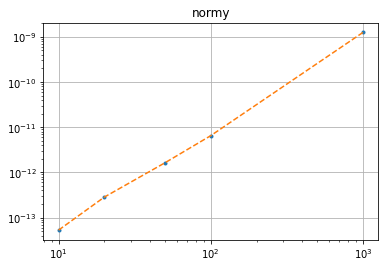

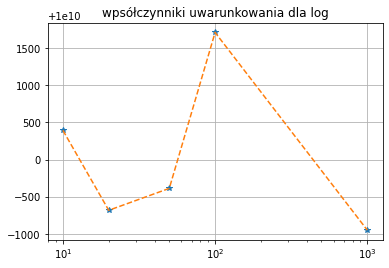

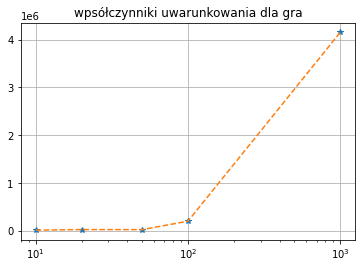

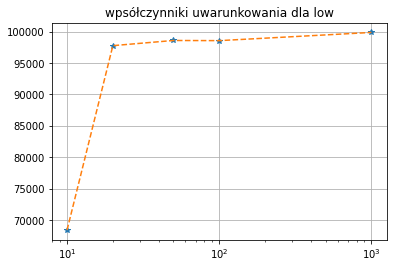

In [8]:
ms = (10,20,50,100,1000)
plt.plot(ms,norms,'.')
plt.plot(ms,norms,'--')
plt.title('normy')
plt.grid('on')
plt.xscale('log')
plt.yscale('log')
plt.figure()
plt.plot(ms,[wps_tupl.log[k] for k in wps_tupl.log.keys()],'*')
plt.plot(ms,[wps_tupl.log[k] for k in wps_tupl.log.keys()],'--')
plt.xscale('log')
plt.title('wpsółczynniki uwarunkowania dla log')
plt.grid('on')
plt.figure()
plt.plot(ms,[wps_tupl.gra[k] for k in wps_tupl.gra.keys()],'*')
plt.plot(ms,[wps_tupl.gra[k] for k in wps_tupl.gra.keys()],'--')
plt.xscale('log')
plt.title('wpsółczynniki uwarunkowania dla gra')
plt.grid('on')
plt.figure()
plt.plot(ms,[wps_tupl.low[k] for k in wps_tupl.low.keys()],'*')
plt.plot(ms,[wps_tupl.low[k] for k in wps_tupl.low.keys()],'--')
plt.xscale('log')
plt.title('wpsółczynniki uwarunkowania dla low')
plt.grid('on')
plt.show()




Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)